<a href="https://colab.research.google.com/github/matheus-bokus/metodos_numericos/blob/master/Projeto_Ra%C3%ADzes_Calculadora_do_Tempo_de_Aplica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fórmula do Cálculo do Tempo de Aplicação



Uma pessoa, que depositou seu dinheiro numa conta Nubank, deseja saber quanto tempo vai levar para o dinheiro dela render até um certo montante. Para isso, é necessário definir o montante acumulado com uma taxa de juros composta, que pode ser dado, não levando em consideração os imposto, por:




> $M(t)=Capital*(1+juros)^t$


Sendo o tempo de aplicação definido por:

>  $t=\frac{ln(Montante/Capital)}{ln(1+Juros)}$

Aonde t = tempo entre a aplicação do capital e o tempo para que se obtenha o rendimento esperado, em anos, Juros=  Juros que incide sobre o capital inicial, Montante= valor final desejado.
 
Isolando o tempo na formula do Juros, pode-se calculá-lo por:




>$ f(t)=\frac{ln(Montante/Capital)}{log(1+Juros)}-t$



Utilizando a taxa selic, pois é o valor que define o rendimento na conta, que atualmente está em 5,50% ao ano, e assumindo que ela se mantém constante, pode-se calcular a quantidade meses necessária para que o Capital chegue ao montante desejado, calculando a raíz de f(t), obtendo assim, o tempo em que irá se obter o valor desejado:




#Implementação

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import math

Para os cálculos, foram supostos um valor inicial de R\$ 4000, e um valor final de R\$ 60000.

In [0]:
vi=4000
vf=60000

## Definição da Função do Tempo

In [0]:
def funcao_tempo(t,vi=4000,vf=60000):
  juros=5.50/(100)
  return np.log(vf/vi)/np.log(1+juros)-t
  

## Definição da Função do Montante

In [0]:
def montante(t,vi):
  juros=5.50/(100)
  return vi*((1+juros)**t)

##Gráfico do Montante em Função do Tempo

In [0]:
t=np.arange(1,30,1)
valor=montante(t,vi)

<function matplotlib.pyplot.show>

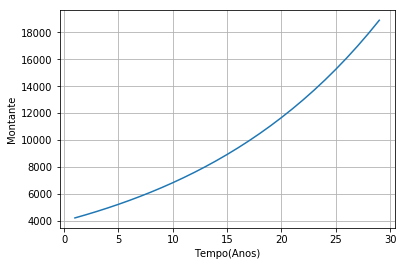

In [0]:
plt.plot(t,valor)
plt.grid(True)
plt.xlabel("Tempo(Anos)")
plt.ylabel("Montante")
plt.show

## Metódo da Bisseção
 O método foi escolhido, por que embora seja considerávelmente lento, o usuário tem uma idéia do tempo que deseja esperar, logo, o método garantirá a convergência do valor do tempo:
 

In [0]:
def bissecao(funcao_tempo, a, b, es, max_it):
    xm = []
    erro = []
    for i in range(max_it):
        xm.append((a+b)/2)
        if funcao_tempo(a)*funcao_tempo(xm[-1]) < 0:
            b = xm[-1]
        else:
            a = xm[-1]
        if i!=0:
            erro.append(np.abs((xm[i]-xm[i-1])/xm[i])*100)
            if erro[-1] <= es:
                return xm, erro

In [0]:
raiz_bissecao, erro_bissecao = bissecao(funcao_tempo,1, 60,0.001,100)
print("Número de iterações realizados: {}".format(len(raiz_bissecao)))
raiz_bissecao

Número de iterações realizados: 17


[30.5,
 45.25,
 52.625,
 48.9375,
 50.78125,
 49.859375,
 50.3203125,
 50.55078125,
 50.666015625,
 50.6083984375,
 50.57958984375,
 50.565185546875,
 50.5723876953125,
 50.57598876953125,
 50.577789306640625,
 50.57868957519531,
 50.579139709472656]

# Metódo da Secante
 Como dito anteriormente, o usuário terá uma idéia de quando ele desejará retirar o dinheiro, logo, ele terá um tempo que deseja testar, indicando que o metódo da secante pode ser aplicado, assim, não sendo necessário calcular a derivada como no Método de Newton-Gauss.
 
 

In [0]:
def secante(f,x0,x1,es,max_it):
    x = []
    erro = []
    x.append(x0)
    x.append(x1)
    for i in range(1,max_it):
        xn = x[i] - f(x[i])*(x[i]-x[i-1])/(f(x[i])-f(x[i-1]))
        x.append(xn)
        erro.append(np.abs((x[-1]-x[-2])/x[-1])*100)
        if erro[-1] <= es:
            return x,erro

In [0]:
raiz_secante, erro_secante = secante(funcao_tempo,1, 75,0.001,100)
print("Número de iterações realizados: {}".format(len(raiz_secante)))
raiz_bissecao


Número de iterações realizados: 4


[30.5,
 45.25,
 52.625,
 48.9375,
 50.78125,
 49.859375,
 50.3203125,
 50.55078125,
 50.666015625,
 50.6083984375,
 50.57958984375,
 50.565185546875,
 50.5723876953125,
 50.57598876953125,
 50.577789306640625,
 50.57868957519531,
 50.579139709472656]

## Comparação do Valor Encontrado

In [0]:
print("Secante: {}, Bisseção: {}".format(raiz_secante[-1],raiz_bissecao[-1]))

Secante: 50.57921947106975, Bisseção: 50.579139709472656


## Calculando os erros

Aqui vemos os valores do erros conforme as iterações das funções:

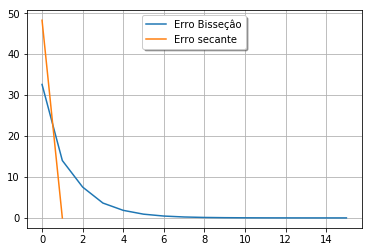

In [0]:
fig, ax = plt.subplots()
ax.plot(erro_bissecao, label='Erro Bisseçâo')
ax.plot( erro_secante, label='Erro secante')
legend = ax.legend(loc='upper center', shadow=True)
plt.grid(True)
plt.show()

Pode-se perceber, que como esperado, O Método da Secante foi bem mais rápido para encontrar o valor mais preciso, pois realizou apenas 4 iterações, enquanto o Método da Bisseção, embora mais exato, realizou 17 iterações.

#Observação

Como trata-se de um valor que contabiliza anos, t, enquando um número real, deve ser aproximado para o valor inteiro superior mais próximo, pois o juros aqui, é contabilizado anualmente, logo, t deve ser aproximado para 51 anos.

In [0]:
print("Método da Secante: Raiz: {}, Montante calculado com a raíz: {}".format(math.ceil(raiz_secante[-1]),montante(math.ceil(raiz_secante[-1]),vi)))
print("Método da Bisseção: Raiz: {}, Montante calculado com a raíz: {}".format(math.ceil(raiz_bissecao[-1]),montante(math.ceil(raiz_bissecao[-1]),vi)))


Método da Secante: Raiz: 51, Montante calculado com a raíz: 61367.07628307682
Método da Bisseção: Raiz: 51, Montante calculado com a raíz: 61367.07628307682


# Resultado

In [0]:
print("Assim, serão necessários {} anos para conseguir retirar o valor estipulado, nas condições impostas".format(math.ceil(raiz_secante[-1])))

Assim, serão necessários 51 anos para conseguir retirar o valor estipulado, nas condições impostas
